In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#plt.rcParams['figure.figsize'] = (9.0, 9.0)
class Adatron:
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
    
    def name(self,):
        return "Adatron"
    
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        X = np.hstack((np.ones((X.shape[0],1)),X))
        self.w = np.zeros(len(X[0]))
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            self.alpha = np.ones(X.shape[0])
            for i in range(len(X)) :
#                 if y[i] * self.decision_function(X[i]) <= 0 :
#                     converged=False
                self.alpha[i]+=self.learning_rate*y[i]
                gamma = y[i]* np.inner(np.transpose(self.w),X[i])
                delta_alpha = self.learning_rate*(1-gamma)
                if (self.alpha[i] + delta_alpha < 0):
                    self.alpha[i] = 0
                elif (self.alpha[i]+delta_alpha > 100):
                    self.alpha[i] = 100
                    self.w += self.alpha[i]*y[i]*X[i]

                else:
                    self.alpha[i] = self.alpha[i] + delta_alpha
                    self.w += self.alpha[i]*y[i]*X[i]

            iterations += 1
        self.converged = converged
#         if converged :
#             print ('%s converged in %d iterations ' % (self.name(),iterations))
#         print ('weight vector: ' + str(self.w))
 
    def decision_function(self, x) :
        return np.inner(self.w, x)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
        X = np.hstack((np.ones((X.shape[0],1)),X))
        scores = np.inner(self.w, X)
        return np.sign(scores)

# The perceptron

In this notebook we will create a Python class that implements the perceptron algorithm.

First, let's write a function that generates linearly separable data in two dimensions:

In [6]:
def generate_separable_data(N) :
    w = np.random.uniform(-1, 1, 2)
    print("W:",w)
    X = np.random.uniform(-1, 1, [N, 2])
#     X = np.hstack((np.ones((X.shape[0],1)),X))
    print (X.shape)
    y = np.sign(np.inner(w, X))
    return X,y,w

In [7]:
generate_separable_data(10)

W: [-0.48168416 -0.14842634]
(10, 2)


(array([[ 0.3320871 , -0.60677118],
        [-0.21712477, -0.13269213],
        [-0.56730638, -0.28728405],
        [ 0.61150571, -0.59582313],
        [-0.62246078,  0.12905505],
        [ 0.30086862,  0.77993639],
        [ 0.51394   , -0.7873829 ],
        [-0.18423549, -0.83222096],
        [-0.32930113, -0.92374719],
        [ 0.84758292,  0.84506289]]),
 array([-1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.]),
 array([-0.48168416, -0.14842634]))

In [ ]:
x=np.hstack((np.ones((x.shape[0],1)),x))
w=np.zeros(len(x[0]))
w,x

In [21]:
a=np.array([1,1,1,-1,1,-1])
b=[]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

The following is a function to display the data and the weight vector:

In [9]:

def plot_data(X, y, w) :
    fig = plt.figure(figsize=(4,4))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    a = -w[0]/w[1]
    pts = np.linspace(-1,1)
    plt.plot(pts, a*pts, 'k-')
    cols = {1: 'r', -1: 'b'}
    for i in range(len(X)): 
        plt.plot(X[i][0], X[i][1], cols[y[i]]+'o')
    plt.show()
 

W: [-0.9226834   0.45382481]
(50, 2)


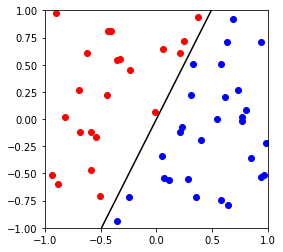

In [10]:
X,y,w = generate_separable_data(50)
plot_data(X, y, w)

And here's the Python class with the implementation of the perceptron:

In [155]:
class Adaltron :
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
 
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
#         X = np.hstack((np.ones((X.shape[0],1)),X))
        self.w = np.zeros(len(X[0]))
        converged = False
        iterations = 0
        prev_error = np.float('inf')
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            self.alpha = np.ones(X.shape[0])
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    print("Start:",y[i] * self.decision_function(X[i]))
#                     print("CONVERGED FALSE:",iterations,i)
                    converged=False                
#                 temp_w = self.w
                    gamma = y[i]* np.inner(np.transpose(self.w),X[i])
    #                 print("GAMMA",gamma)
    #                 print("ALPHA",self.alpha[i])
                    delta_alpha = self.learning_rate*(1-gamma)
    #                 if y[i] * self.decision_function(X[i]) <= 0 :
                    if (self.alpha[i] + delta_alpha < 0):
                        self.alpha[i] = 0
                    else:
    #                     print("ALPHA changed")
                        self.alpha[i] = self.alpha[i] + delta_alpha
                        self.w += self.alpha[i]*y[i]*X[i]

#                 self.w += self.alpha[i]*y[i]*X[i]


#             self.w = temp_w
            print("iteration:",iterations)
    
            print("MISCLASSIFIED:",(len(self.predict(X)) - np.sum(self.predict(X) == y)))
            print("wwww:",self.w)
            plot_data(X, y, self.w)

            iterations += 1

    
#                 if y[i] * self.decision_function(X[i]) <= 0 :
#                     self.w = self.w + y[i] * self.learning_rate * X[i]
#                     print("Changed:",self.w)
#                     converged = False
#                     y_predict = self.predict(X)
#                     num_misclassified = len(y_predict) - np.sum(y_predict == y)
#                     print("WWWWW:")
#                     plot_data(X, y, self.w)
#                     if num_misclassified < prev_error:
#                         self.w_pocket = self.w
#                         print("PPPPPP")
#                         plot_data(X, y, self.w_pocket)

                        
#                         prev_error = num_misclassified
#             print("OUT:",self.w,self.w_pocket)
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iterations)
        print ('weight vector: ' + str(self.w))
#         print ('weight vector: ' + str(self.w_pocket))

 
    def decision_function(self, x) :
        return np.inner(self.w, x)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.inner(self.w, X)
        return np.sign(scores)
 


In [156]:
# Perceptron class
class Perceptron :
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
 
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
    
        self.w = np.zeros(len(X[0]))
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    print("Start:",y[i] * self.decision_function(X[i]))
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
            print("iteration:",iterations)
            print("MISCLASSIFIED:",(len(self.predict(X)) - np.sum(self.predict(X) == y)))
            plot_data(X, y, self.w)            
            iterations += 1

        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iterations)
        print ('weight vector: ' + str(self.w))
 
    def decision_function(self, x) :
        return np.inner(self.w, x)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.inner(self.w, X)
        return np.sign(scores)

W: [-0.14685402 -0.50497468]
(40, 2)
[-0.14685402 -0.50497468]
Start: -0.0
Start: -0.18333812990075887
Start: -0.2873703477178972
Start: -0.009561795407635632
iteration: 0
MISCLASSIFIED: 4
wwww: [ 0.39768348 -1.40699205]


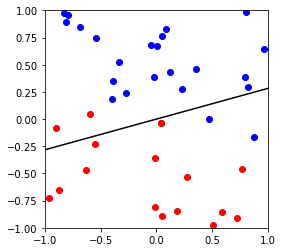

Start: -0.24089202509465202
iteration: 1
MISCLASSIFIED: 0
wwww: [-0.72159171 -1.50965151]


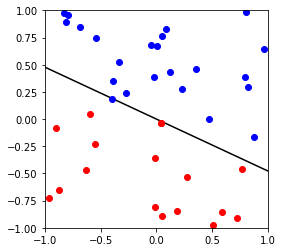

iteration: 2
MISCLASSIFIED: 0
wwww: [-0.72159171 -1.50965151]


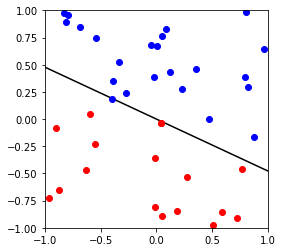

converged in 3 iterations 
weight vector: [-0.72159171 -1.50965151]


In [157]:
X,y,w = generate_separable_data(40)
print(w)
p = Adaltron()
p.fit(X,y)

Let's compare the two weight vectors:

In [ ]:
p.w, w

Let's normalize the two vectors into unit vectors:

In [ ]:
p.w/np.sqrt(np.inner(p.w, p.w))
w/np.sqrt(np.inner(w, w))


Now we can see that they are pointing more or less in the same direction!